# Harsha Mangnani (hm495)

# Question 1 [5 points]

In [85]:
%matplotlib inline
%pylab inline
!pip install seaborn

Populating the interactive namespace from numpy and matplotlib


In [86]:
#import packages

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
import seaborn as sb

In [87]:
#load the datset

df=pd.read_csv('boston.csv',index_col=0)
df.head()

,ZN,NDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
CRIM,,,,,,,,,,,,,
0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


,ZN,NDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
CRIM,,,,,,,,,,,,,
0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


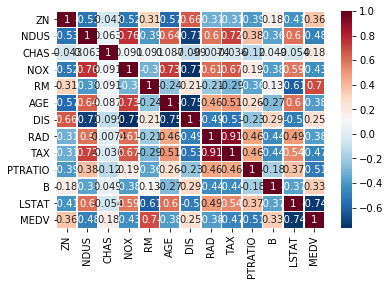

In [88]:
#correlation amongst all colums, visualize the correlation using seaborn (visualisation library)
# cool --> negative, dark --> positive.
#darker colors represent high correlation so we can focus on those columns, saves time!
#focus on dark blue and dark red

pearsoncorr = df.corr(method="pearson")
sb.heatmap(pearsoncorr,
           xticklabels = pearsoncorr.columns,
           yticklabels = pearsoncorr.columns,
          cmap = 'RdBu_r',
          annot = True,
          linewidth=0.5)

# For NOX, SIGNIFICANT correlation (+- 0.6 or more) with NDUS, AGE, DIS, RAD, TAX, LSTAT

In [89]:
#regression model for NOX and NDUS
y=df.NOX
x=df.NDUS
x=sm.add_constant(x)
lr1=sm.OLS(y,x).fit()

In [90]:
print(lr1.summary())

                            OLS Regression Results                            
Dep. Variable:                    NOX   R-squared:                       0.583
Model:                            OLS   Adj. R-squared:                  0.582
Method:                 Least Squares   F-statistic:                     705.1
Date:                Wed, 19 Feb 2020   Prob (F-statistic):           7.91e-98
Time:                        22:42:59   Log-Likelihood:                 594.45
No. Observations:                 506   AIC:                            -1185.
Df Residuals:                     504   BIC:                            -1176.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.4110      0.006     64.710      0.0

In [91]:
#LR1 --> y=mx+c
#LR1 --> NOX = 0.0129 * NDUS + 0.4110

In [92]:
#regression model for NOX and AGE
y=df.NOX
x=df.AGE
x=sm.add_constant(x)
lr2=sm.OLS(y,x).fit()

In [93]:
print(lr2.summary())

                            OLS Regression Results                            
Dep. Variable:                    NOX   R-squared:                       0.535
Model:                            OLS   Adj. R-squared:                  0.534
Method:                 Least Squares   F-statistic:                     580.0
Date:                Wed, 19 Feb 2020   Prob (F-statistic):           7.45e-86
Time:                        22:43:04   Log-Likelihood:                 566.81
No. Observations:                 506   AIC:                            -1130.
Df Residuals:                     504   BIC:                            -1121.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.3482      0.009     37.574      0.0

In [94]:
#LR2 --> NOX = 0.0030 * AGE + 0.3482

In [95]:
#regression model for NOX and DIS
y=df.NOX
x=df.DIS
x=sm.add_constant(x)
lr3=sm.OLS(y,x).fit()

In [96]:
print(lr3.summary())

                            OLS Regression Results                            
Dep. Variable:                    NOX   R-squared:                       0.592
Model:                            OLS   Adj. R-squared:                  0.591
Method:                 Least Squares   F-statistic:                     730.4
Date:                Wed, 19 Feb 2020   Prob (F-statistic):          4.23e-100
Time:                        22:43:13   Log-Likelihood:                 599.69
No. Observations:                 506   AIC:                            -1195.
Df Residuals:                     504   BIC:                            -1187.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.7153      0.007    105.257      0.0

In [97]:
#LR3 ---> NOX = -0.0423 * DIS + 0.7153

In [98]:
#regression model for NOX and RAD
y=df.NOX
x=df.RAD
x=sm.add_constant(x)
lr4=sm.OLS(y,x).fit()

In [99]:
print(lr4.summary())

                            OLS Regression Results                            
Dep. Variable:                    NOX   R-squared:                       0.374
Model:                            OLS   Adj. R-squared:                  0.373
Method:                 Least Squares   F-statistic:                     300.9
Date:                Wed, 19 Feb 2020   Prob (F-statistic):           3.34e-53
Time:                        22:43:20   Log-Likelihood:                 491.51
No. Observations:                 506   AIC:                            -979.0
Df Residuals:                     504   BIC:                            -970.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.4770      0.006     78.722      0.0

In [100]:
#LR4 --> NOX = 0.0081 * RAD + 0.4770

In [101]:
#regression model for NOX and TAX
y=df.NOX
x=df.TAX
x=sm.add_constant(x)
lr5=sm.OLS(y,x).fit()

In [102]:
print(lr5.summary())

                            OLS Regression Results                            
Dep. Variable:                    NOX   R-squared:                       0.446
Model:                            OLS   Adj. R-squared:                  0.445
Method:                 Least Squares   F-statistic:                     406.2
Date:                Wed, 19 Feb 2020   Prob (F-statistic):           1.09e-66
Time:                        22:43:26   Log-Likelihood:                 522.59
No. Observations:                 506   AIC:                            -1041.
Df Residuals:                     504   BIC:                            -1033.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.3672      0.010     36.486      0.0

In [103]:
#LR5 --> NOX = 0.0005 * TAX + 0.3672

In [104]:
#regression model for NOX and LSTAT
y=df.NOX
x=df.LSTAT
x=sm.add_constant(x)
lr6=sm.OLS(y,x).fit()

In [105]:
print(lr6.summary())

                            OLS Regression Results                            
Dep. Variable:                    NOX   R-squared:                       0.349
Model:                            OLS   Adj. R-squared:                  0.348
Method:                 Least Squares   F-statistic:                     270.4
Date:                Wed, 19 Feb 2020   Prob (F-statistic):           5.98e-49
Time:                        22:43:31   Log-Likelihood:                 481.71
No. Observations:                 506   AIC:                            -959.4
Df Residuals:                     504   BIC:                            -951.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.4334      0.008     51.164      0.0

In [106]:
#LR6 --> 0.0096 * LSTAT + 0.4334

# COMPARING AIC AND BIC VALUES OF LR1 TO LR6: LOWER BETTER!

# LR1,LR2 and LR3 have lowest AIC and BIC . (in negative 1100s) So, NDUS, AGE and DIS.

In [107]:
#multiple regression model for NOX with NDUS and DIS
y=df.NOX #target
x=df[['NDUS','DIS']] #predictors
x=sm.add_constant(x)
mlr1=sm.OLS(y,x).fit()

In [108]:
print(mlr1.summary())

                            OLS Regression Results                            
Dep. Variable:                    NOX   R-squared:                       0.688
Model:                            OLS   Adj. R-squared:                  0.687
Method:                 Least Squares   F-statistic:                     554.3
Date:                Wed, 19 Feb 2020   Prob (F-statistic):          6.52e-128
Time:                        22:43:39   Log-Likelihood:                 667.66
No. Observations:                 506   AIC:                            -1329.
Df Residuals:                     503   BIC:                            -1317.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.5678      0.013     42.821      0.0

In [109]:
#multiple regression model for NOX with NDUS and AGE
y=df.NOX #target
x=df[['NDUS','AGE']] #predictors
x=sm.add_constant(x)
mlr2=sm.OLS(y,x).fit()

In [110]:
print(mlr2.summary())

                            OLS Regression Results                            
Dep. Variable:                    NOX   R-squared:                       0.681
Model:                            OLS   Adj. R-squared:                  0.680
Method:                 Least Squares   F-statistic:                     536.9
Date:                Wed, 19 Feb 2020   Prob (F-statistic):          1.60e-125
Time:                        22:43:44   Log-Likelihood:                 662.13
No. Observations:                 506   AIC:                            -1318.
Df Residuals:                     503   BIC:                            -1306.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.3452      0.008     44.906      0.0

In [111]:
#multiple regression model for NOX with AGE and DIS
y=df.NOX #target
x=df[['AGE','DIS']] #predictors
x=sm.add_constant(x)
mlr3=sm.OLS(y,x).fit()

In [112]:
print(mlr3.summary())

                            OLS Regression Results                            
Dep. Variable:                    NOX   R-squared:                       0.647
Model:                            OLS   Adj. R-squared:                  0.646
Method:                 Least Squares   F-statistic:                     461.1
Date:                Wed, 19 Feb 2020   Prob (F-statistic):          1.76e-114
Time:                        22:43:49   Log-Likelihood:                 636.55
No. Observations:                 506   AIC:                            -1267.
Df Residuals:                     503   BIC:                            -1254.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.5599      0.019     30.096      0.0

# NDUS has more influence. Without NDUS, AIC and BIC values are high

In [113]:
#multiple regression model for NOX with NDUS and DIS and AGE
y=df.NOX #target
x=df[['NDUS','DIS','AGE']] #predictors
x=sm.add_constant(x)
mlr4=sm.OLS(y,x).fit()

In [114]:
print(mlr4.summary())

                            OLS Regression Results                            
Dep. Variable:                    NOX   R-squared:                       0.715
Model:                            OLS   Adj. R-squared:                  0.713
Method:                 Least Squares   F-statistic:                     419.4
Date:                Wed, 19 Feb 2020   Prob (F-statistic):          2.62e-136
Time:                        22:43:51   Log-Likelihood:                 690.48
No. Observations:                 506   AIC:                            -1373.
Df Residuals:                     502   BIC:                            -1356.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.4758      0.018     25.818      0.0

# AIC and BIC are lowest for mlr4. Hence, best predictors for NOX are NDUS, AGE and DIS

# NOX = 0.0064 * NDUS - 0.0170 * DIS + 0.0010 * AGE + 0.4758

If we have to choose two, we can go ahead with NDUS and DIS, as AGE has lower impact as compared to other two predictors. i.e. MLR1
Also, Next Lowest AIC and BIC are for MLR1 model.

In [115]:
print(mlr1.params)

const    0.567790
NDUS     0.007418
DIS     -0.025219
dtype: float64


# NOX = 0.0074 * NDUS - 0.0252 * DIS + 0.5677

In [116]:
#multiple regression model for NOX with NDUS and DIS
y=df.NOX #target
x=df[['NDUS','DIS']] #predictors
x=sm.add_constant(x)
mlr1=sm.OLS(y,x).fit()
print(mlr1.summary())

                            OLS Regression Results                            
Dep. Variable:                    NOX   R-squared:                       0.688
Model:                            OLS   Adj. R-squared:                  0.687
Method:                 Least Squares   F-statistic:                     554.3
Date:                Wed, 19 Feb 2020   Prob (F-statistic):          6.52e-128
Time:                        22:44:01   Log-Likelihood:                 667.66
No. Observations:                 506   AIC:                            -1329.
Df Residuals:                     503   BIC:                            -1317.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.5678      0.013     42.821      0.0

In [117]:
#Regression plot
from mpl_toolkits.mplot3d import Axes3D

In [118]:
# Figure out X and Y axes using ranges from NDUS  and DIS
X_axis,Y_axis = np.meshgrid(np.linspace(x.NDUS.min(),x.NDUS.max(),100), np.linspace(x.DIS.min(),x.DIS.max(),100))

In [119]:
# Plot the hyperplane by calculating corresponding Z axis (NOX)
Z_axis=mlr1.params[0] + mlr1.params[1]*X_axis + mlr1.params[2]*Y_axis

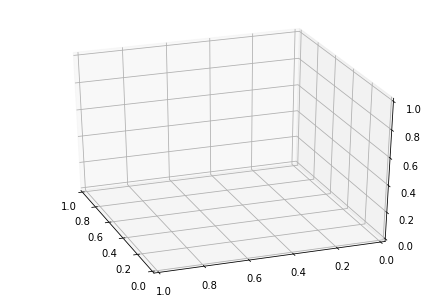

In [121]:
# Create matplotlib 3D axes
fig = plt.figure(figsize=(6,4))
ax=Axes3D(fig,azim=160)

In [122]:
# Plot hyperplane
ax.plot_surface(X_axis,Y_axis,Z_axis,cmap=plt.cm.coolwarm,alpha=0.5,linewidth=0)

In [123]:
# Plot data points
ax.scatter(x.NDUS,x.DIS,y)

In [124]:
# Set axes labels
ax.set_xlabel('NDUS')
ax.set_ylabel('DIS')
ax.set_zlabel('NOX')

Text(0.08754692085327548, -0.02041189982088601, 'NOX')

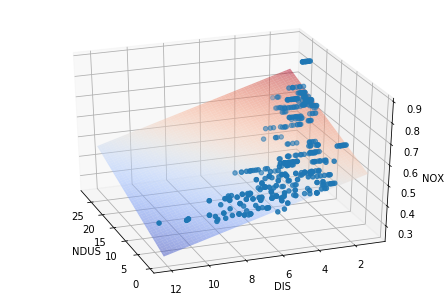

In [125]:
%matplotlib inline
fig

#   Question 2 [5 points]

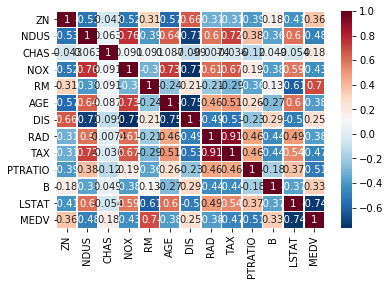

In [126]:
#correlation amongst variables:

pearsoncorr = df.corr(method="pearson")
sb.heatmap(pearsoncorr,
           xticklabels = pearsoncorr.columns,
           yticklabels = pearsoncorr.columns,
          cmap = 'RdBu_r',
          annot = True,
          linewidth=0.5)

# For MEDV, SIGNIFICANT correlation (+- 0.6 or more) with RM and LSTAT

In [127]:
#regression model for MEDV and RM
y=df.MEDV
x=df.RM
x=sm.add_constant(x)
lr1=sm.OLS(y,x).fit()

In [128]:
print(lr1.summary())

                            OLS Regression Results                            
Dep. Variable:                   MEDV   R-squared:                       0.484
Model:                            OLS   Adj. R-squared:                  0.483
Method:                 Least Squares   F-statistic:                     471.8
Date:                Wed, 19 Feb 2020   Prob (F-statistic):           2.49e-74
Time:                        22:45:21   Log-Likelihood:                -1673.1
No. Observations:                 506   AIC:                             3350.
Df Residuals:                     504   BIC:                             3359.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -34.6706      2.650    -13.084      0.0

In [129]:
#LR1 --> MEDV = 9.1201 * RM - 34.6706

In [130]:
#regression model for MEDV and LSTAT
y=df.MEDV
x=df.LSTAT
x=sm.add_constant(x)
lr2=sm.OLS(y,x).fit()

In [131]:
print(lr2.summary())

                            OLS Regression Results                            
Dep. Variable:                   MEDV   R-squared:                       0.544
Model:                            OLS   Adj. R-squared:                  0.543
Method:                 Least Squares   F-statistic:                     601.6
Date:                Wed, 19 Feb 2020   Prob (F-statistic):           5.08e-88
Time:                        22:45:27   Log-Likelihood:                -1641.5
No. Observations:                 506   AIC:                             3287.
Df Residuals:                     504   BIC:                             3295.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         34.5538      0.563     61.415      0.0

In [132]:
#LR2 --> -0.95 LSTAT + 34.5538

In [133]:
#MULTIPLE REGRESSION 
y=df.MEDV
x=df[['RM','LSTAT']]
x=sm.add_constant(x)
mlr=sm.OLS(y,x).fit()

In [134]:
print(mlr.summary())

                            OLS Regression Results                            
Dep. Variable:                   MEDV   R-squared:                       0.639
Model:                            OLS   Adj. R-squared:                  0.637
Method:                 Least Squares   F-statistic:                     444.3
Date:                Wed, 19 Feb 2020   Prob (F-statistic):          7.01e-112
Time:                        22:45:32   Log-Likelihood:                -1582.8
No. Observations:                 506   AIC:                             3172.
Df Residuals:                     503   BIC:                             3184.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -1.3583      3.173     -0.428      0.6

# MLR has the lowest AIC and BIC values. So, we go ahead with following equation

# MEDV = 5.0948 * RM - 0.6424 * LSTAT - 1.3583

In [135]:
# Figure out X and Y axes using ranges from RM and LSTAT
X_axis,Y_axis = np.meshgrid(np.linspace(x.RM.min(),x.RM.max(),100), np.linspace(x.LSTAT.min(),x.LSTAT.max(),100))

In [136]:
# Plot the hyperplane by calculating corresponding Z axis (MEDV)
Z_axis=mlr.params[0] + mlr.params[1]*X_axis + mlr.params[2]*Y_axis

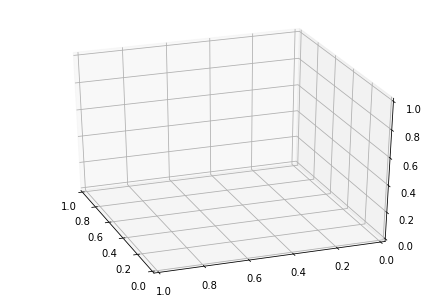

In [137]:
# Create matplotlib 3D axes
fig = plt.figure(figsize=(6,4))
ax=Axes3D(fig,azim=160)

In [138]:
# Plot hyperplane
ax.plot_surface(X_axis,Y_axis,Z_axis,cmap=plt.cm.coolwarm,alpha=0.5,linewidth=0)

In [139]:
# Plot data points
ax.scatter(x.RM,x.LSTAT,y)

In [140]:
# Set axes labels
ax.set_xlabel('RM')
ax.set_ylabel('LSTAT')
ax.set_zlabel('MEDV')

Text(0.08754692085327548, -0.02041189982088601, 'MEDV')

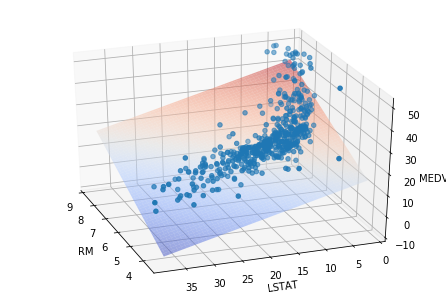

In [141]:
%matplotlib inline
fig

# END

Naviagte:

# Q1 EQUATION ON 115


# Q1 PLOT ON 125


# Q2 EQUATION ON 134

# Q2 PLOT ON 141